[View in Colaboratory](https://colab.research.google.com/github/pedro00dk/python-lml/blob/master/tensorflow.ipynb)

# TensorFlow

This notebook contains my progress studing the TensorFlow library.


### Resources
* https://www.tensorflow.org/guide/
* https://www.tensorflow.org/api_docs/
* https://learningtensorflow.com/getting_started/


## What is tensorflow

Tensorflow is a way to represent computation without executing it until asked. It's like lazy evaluation, the entire program is configured and only waits the input.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import tensorflow as tf

## Basics

### Constants and Variables

First of all, look at this python example, it simply creates a variable x with the value of 10, then, creates y with the sum of x and 5.

```python
x = 10
y = x + 5
print(y) # 15
```

The tensorflow equivalent is:

In [9]:
x = tf.constant(10, name='x')
y = tf.Variable(x + 5, name='y')

# another way
# v = tf.constant(5)
# x = tf.constant(10)
# y = x + v # in this case y is a Tensor, not a tf.Variable

print(x, y)

Tensor("x_3:0", shape=(), dtype=int32) <tf.Variable 'y_3:0' shape=() dtype=int32_ref>


As seen, it doesn't output 15, but a function to compute the result. To compute the result, it's necessary to create some new objects.

In [3]:
# Initializes the tf.Variable elements (not needed when there is only Tensors)
model = tf.global_variables_initializer()

# Se
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

15


The `tf.global_variables_initializer` is used to initialize tf.Variable object, but isn't necessary for Tensor objects.

The `tf.Session` runs the graph created with the operations. It's a closeable object.

In [4]:
x = tf.constant([[10, 20], [30, 40]], name='x')
y = tf.Variable(x + 5, name='y')


with tf.Session() as session:
    session.run(tf.global_variables_initializer()) # inlined global_variables_initializer
    print(session.run(y))

[[15 25]
 [35 45]]


Example of function

$5x^2-3x+15$

In [5]:

x = tf.constant(np.arange(-8, 9))

a = tf.Variable(5 * x**2)
b = tf.Variable(3 * x)
c = tf.constant(15, dtype=tf.int64)
y = tf.Variable(a - b + c)
# y = tf.Variable(5 * x ** 2 - 3 * x + 15) # in a single declaration

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    print(session.run(y))

[359 281 213 155 107  69  41  23  15  17  29  51  83 125 177 239 311]


It's possible to update variables in loops

In [23]:
x = tf.constant(0)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for i in range(5):
        x = x + 1
        print(session.run(x), end=' ')

1 2 3 4 5 

In [25]:
import tensorflow as tf

x = tf.constant(35, name='x')
print(x)
y = tf.Variable(x + 5, name='y')

with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/basic", session.graph)
    model =  tf.global_variables_initializer()
    session.run(model)
    print(session.run(y))

Tensor("x_4:0", shape=(), dtype=int32)
40


### Arrays

Arrays are extensively used in tensorflow, almost all programs use it.

In [38]:
# download example image
!curl --output image.jpg -- https://learningtensorflow.com/images/MarshOrchid.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5748k  100 5748k    0     0  4925k      0  0:00:01  0:00:01 --:--:-- 4925k


(5528, 3685, 3)


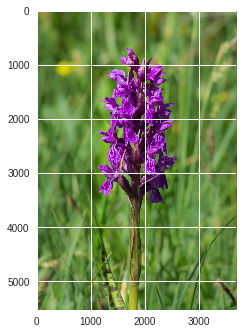

In [47]:
image_path = pathlib.Path('./image.jpg').absolute()

image = plt.imread(image_path)
print(image.shape)

plt.imshow(image)
plt.show()

In [0]:
x = tf.Variable(image)

model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2])
	session.run(model)
	result = session.run(x)


plt.imshow(result)
plt.show()